# Labeling MNIST data with a convolutional neural network

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [75]:
mnist = tf.keras.datasets.mnist

In [13]:
print('TensorFlow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [14]:
print(tf.__file__)
print(tf.keras.__file__)

c:\Users\Alessandro\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\__init__.py
c:\Users\Alessandro\anaconda3\envs\tfgpu\lib\site-packages\keras\api\_v2\keras\__init__.py


In [15]:
# first, we load the data:

data = pd.read_csv('digit-recognizer/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data preparation:

Now, the first column are the labels, the remaining 784 columns are the pixel values. I have to:

1) split the data in train and validation sets

2) split validation sets into features and labels

3) correctly format features intoa a 28x28 grid

In [52]:
val_split=0.3

In [16]:
def data_prep(input_df,verbose=False):
    rng = np.random.default_rng(seed=123)
    data=np.array(input_df)
    m,n=data.shape
    rng.shuffle(data)
    #train_size=int(m*split)
    #x_val=data[:train_size,1:]#the last 784 columns of the first train_size rows are the training features
    #y_val=data[:train_size,0]
    x_train=data[:,1:]
    y_train=data[:,0]
    x_train=(x_train.reshape(-1,28,28)/255.).astype('float32')
    #x_val=(x_val.reshape(-1,28,28)/255.).astype('float32')
    if verbose:
        print(x_train.shape)
    y_train = tf.keras.utils.to_categorical(y_train)
    #y_val = tf.keras.utils.to_categorical(y_val)
    return x_train,y_train

Should use datasets maybe

In [80]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [81]:
x_train.shape

(60000, 28, 28, 1)

In [82]:
y_train = tf.keras.utils.to_categorical(y_train)

In [83]:
#x_train, y_train= data_prep(data, verbose=True)

In [84]:
#x_train = tf.expand_dims(x_train, axis=-1)
#x_val = tf.expand_dims(x_val, axis=-1)
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_val = x_val.reshape(-1, 28, 28, 1)

In [85]:
x_train=tf.convert_to_tensor(x_train)
y_train=tf.convert_to_tensor(y_train)

#### Now I have the data prepared, I can construct a CNN and feed data to it:

In [86]:
def create_model():
    '''simple convolutional neural network'''
    model=tf.keras.models.Sequential(name='CNN_MNIST')
    model.add(tf.keras.layers.Conv2D(20,4,strides=(1,1), activation='relu',input_shape=(28,28,1,),name='Conv1'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(20,3,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=100,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=100,activation='relu'))
    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [87]:
def create_model_functionalAPI():
    input=tf.keras.Input(shape=(28,28,1,))
    x=tf.keras.layers.Conv2D(20,4,strides=(1,1), activation='relu',input_shape=(28,28,1,),name='Conv1')(input)
    x=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x=tf.keras.layers.Conv2D(20,3,activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(units=100,activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    x=tf.keras.layers.Dense(units=100,activation='relu')(x)
    output=tf.keras.layers.Dense(units=10,activation='softmax')(x)
    model=tf.keras.Model(input,output)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [88]:
model_func=create_model_functionalAPI()
model_func.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 25, 25, 20)        340       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 20)        3620      
                                                                 
 dropout_10 (Dropout)        (None, 10, 10, 20)        0         
                                                                 
 flatten_5 (Flatten)         (None, 2000)              0         
                                                           

In [89]:
def visualize_example(x,y,index):
    #img=np.reshape(x[index],(28,28))
    img=x[index]*255.
    label=np.argmax(y[index])
    print('Example number: ', index, '\nLabel: ' , label)
    plt.gray()
    plt.imshow(img, interpolation='nearest')
    plt.show()


In [90]:
def test_model(model,x,y,ind,show_probability=False):
    example=x[None,ind]
    if show_probability:
        print(model(example))
    prediction=np.argmax(model.predict(example))
    print('Prediction: ', prediction)
    visualize_example(x,y,ind)


In [91]:
model=create_model()
print(model.summary())

Model: "CNN_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 25, 25, 20)        340       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 20)        3620      
                                                                 
 dropout_12 (Dropout)        (None, 10, 10, 20)        0         
                                                                 
 flatten_6 (Flatten)         (None, 2000)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               200100    
                                                         

In [92]:
x_train.shape#(42000, 28, 28,1)

TensorShape([60000, 28, 28, 1])

I should tell the training function to stop then the validation loss strts growing again. Also should get model checkpoints and save the best performing model iteration

-> keras kallbacks

In [93]:
history = model_func.fit(x_train, y_train,batch_size=30, epochs=50, validation_split=val_split)

Epoch 1/50
1400/1400 [==============================] - 11s 8ms/step - loss: 0.2154 - accuracy: 0.9317 - val_loss: 0.0715 - val_accuracy: 0.9794
Epoch 2/50
1400/1400 [==============================] - 10s 7ms/step - loss: 0.0746 - accuracy: 0.9770 - val_loss: 0.0705 - val_accuracy: 0.9799
Epoch 3/50
1400/1400 [==============================] - 10s 7ms/step - loss: 0.0557 - accuracy: 0.9828 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 4/50
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 5/50
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 6/50
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0595 - val_accuracy: 0.9842
Epoch 7/50
1400/1400 [==============================] - 11s 8ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0415 - val_ac

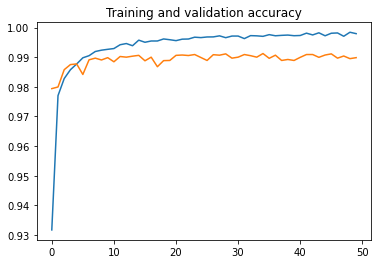

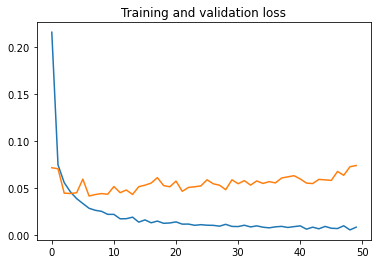

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.show()

In [95]:
model.predict(x_train[None,np.random.randint(0,4000)])

1/1 [==============================] - 0s 85ms/step


array([[0.09274788, 0.10101694, 0.08581778, 0.10063553, 0.10526346,
        0.09277234, 0.10844887, 0.09309308, 0.09863895, 0.12156512]],
      dtype=float32)

tf.Tensor(
[[0.09715835 0.10669772 0.08560418 0.10408791 0.10114983 0.08480825
  0.11308005 0.08873642 0.10160948 0.11706784]], shape=(1, 10), dtype=float32)
1/1 [==============================] - 0s 26ms/step
Prediction:  9
Example number:  35157 
Label:  0


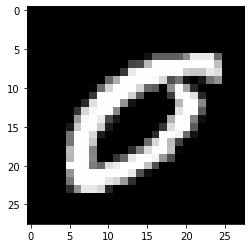

In [96]:
test_model(model,x_train,y_train,np.random.randint(0,x_train.shape[0]),show_probability=True)

In [97]:
from datetime import datetime

In [98]:
timestamp=datetime.today().strftime('%Y%m%d%H%M%S')

In [99]:
# Save the trained model
savemodel=True
modelFileName = 'models/mnist_CNNv1_'+timestamp+'.h5'
if savemodel:
    model_func.save(modelFileName)
    #del model  # deletes the existing model variable
    print('model saved as', modelFileName)

model saved as models/mnist_CNNv1_20221110172433.h5


Next: obtain confusion matrix

In [100]:
model = tf.keras.models.load_model(modelFileName)


1875/1875 [==============================] - 5s 3ms/step


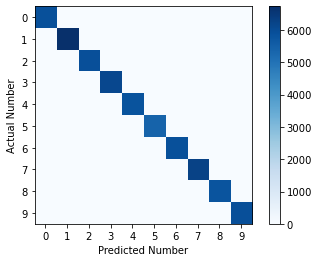

              precision    recall  f1-score   support

           0      0.997     0.999     0.998      5923
           1      0.998     0.999     0.998      6742
           2      0.996     0.997     0.997      5958
           3      0.998     0.996     0.997      6131
           4      0.996     0.997     0.997      5842
           5      0.998     0.996     0.997      5421
           6      0.998     0.998     0.998      5918
           7      0.994     0.997     0.996      6265
           8      0.998     0.992     0.995      5851
           9      0.994     0.996     0.995      5949

    accuracy                          0.997     60000
   macro avg      0.997     0.997     0.997     60000
weighted avg      0.997     0.997     0.997     60000



In [101]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
#import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model_func.predict(x_train)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_train,axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks, rotation=0)
plt.yticks(tick_marks, tick_marks)
plt.xlabel("Predicted Number")
plt.ylabel("Actual Number")
plt.show()
#print(cm)
print(classification_report(true_labels,predictions,digits=3))

In [102]:
print(true_labels)

[5 0 4 ... 5 6 8]


In [103]:
kaggle_test=pd.read_csv('digit-recognizer/test.csv')
kaggle_test.shape
kaggle_test = np.array(kaggle_test).reshape(-1, 28, 28, 1)


In [104]:
kaggle_predictions=model.predict(kaggle_test)

875/875 [==============================] - 3s 3ms/step


In [105]:
print(np.argmax(kaggle_predictions,axis=1).shape)

(28000,)


tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
1/1 [==============================] - 0s 100ms/step
Prediction:  8
Example number:  17651 
Label:  8


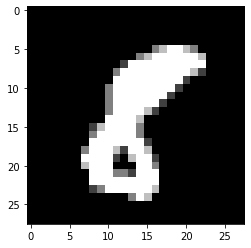

In [106]:
test_model(model,kaggle_test,kaggle_predictions,np.random.randint(0,28000),show_probability=True)

In [107]:
sample=pd.read_csv('digit-recognizer/sample_submission.csv')
sample['Label']=np.argmax(kaggle_predictions,axis=1)
sample

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [108]:
sample.to_csv('kaggle_predictions_CNN.csv',index=None)